<div style="padding:25px;color:white;margin:0;font-size:200%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:#800020;letter-spacing:1px;overflow:hidden"><b>Flower Recognition Using CNN + Transfer Learning</b></div>

<div style="text-align: center;">
  <b>If you want to be the first to be informed about new projects, please do not forget to follow us - by Fatma Nur AZMAN</b><br>
  <div style="padding:10px; border: 2px solid #800020; border-radius: 10px; display: inline-block; margin-top: 10px;">
    <a href="https://fatmanurazman.vercel.app/" style="color:#D3D3D3;">Fatmanurazman.com |</a>  
    <a href="https://www.linkedin.com/in/fatma-nur-azman/" style="color:#D3D3D3;">Linkedin |</a>  
    <a href="https://github.com/Fatma-Nur-Azman" style="color:#D3D3D3;">Github |</a>  
    <a href="https://www.kaggle.com/fnurazman" style="color:#D3D3D3;">Kaggle |</a>
    <a href="https://public.tableau.com/app/profile/fatma.nur.azman/vizzes" style="color:#D3D3D3;">Tableau</a>
  </div>
</div>


<div style="text-align: center;">
  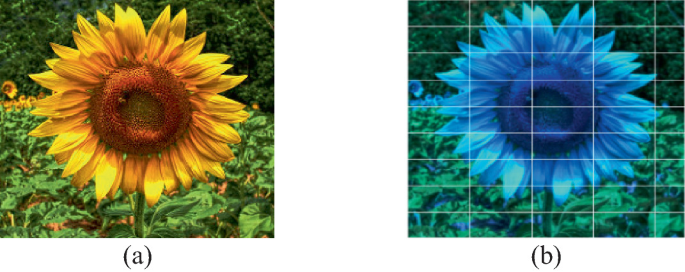
</div>


## Project Overview
**Flower Recognition Using CNN and Transfer Learning**

This project applies Convolutional Neural Networks (CNN) and Transfer Learning to classify images of flowers into five categories. The goal is to automate flower identification to support botanical research, education, and conservation efforts using a dataset of flower images sourced online.

### Importance of Automated Flower Recognition
Automated recognition systems help in cataloging species, monitoring biodiversity, and assisting in ecological conservation by providing fast and accurate flower identification. These tools have applications in education, research, and agricultural planning.

### Project Execution Steps
- **Image Preprocessing**: Resizing and augmenting images to improve model performance.
- **Normalization**: Standardizing pixel values for consistent training.
- **Model Development**: Using CNN for feature extraction and Transfer Learning to boost model accuracy.
- **Performance Evaluation**: Continuously improving the model based on accuracy metrics.

### Applications and Impact
- **Educational Tools**: Enhancing plant classification in botanical education.
- **Conservation**: Assisting in the documentation and monitoring of plant species.
- **Agricultural Planning**: Helping in the identification of plant species for garden management.

### Conclusion
This project demonstrates the value of CNN and Transfer Learning for flower recognition, contributing to educational, conservation, and agricultural applications.

---

## About the Dataset
The Flower Recognition Dataset contains **4242 images** of flowers from sources like Flickr, Google, and Yandex Images. The dataset consists of five flower categories: Daisy, Tulip, Rose, Sunflower, and Dandelion, with around 800 photos per class. The images vary in size (approx. 320x240 pixels) and maintain their original proportions, adding complexity and realism to the task.

- **Classes**: Daisy, Tulip, Rose, Sunflower, Dandelion
- **Resolution**: Approx. 320x240 pixels
- **Total Images**: 4242
- **Source**: Scraped from Flickr, Google Images, and Yandex Images

The dataset supports both academic research and practical applications in plant recognition. You can find the original dataset on Kaggle: [Flower Recognition Dataset](https://www.kaggle.com/alxmamaev/flowers-recognition).


## Project Summary:

In this project:

A detailed **exploratory analysis** was conducted to:
- Identify the images in each class
- Determine their dimensions
- Decide whether scaling was needed
- Examine the data distribution across classes

For **transfer learning models**, base models were created by freezing the pretrained layers. Since the dataset is small to medium-sized, the **smallest versions of transfer learning models** were chosen to avoid overfitting. However, even these smaller models were slightly large for the dataset.

### Additional Transfer Learning Models:
This study, in collaboration with **Duygu Jones**, applies a CNN model along with **10 different transfer learning models** to the Flowers Recognition dataset. Additional models explored include:

- VGG16
- InceptionV3
- NASNetMobile
- EfficientNetB3
- EfficientNetV2-S
- ConvNeXtTiny

For further details on these models and their implementation, please refer to the Kaggle notebook available at this link: [Flowers Rec | CNN | 10 Transfer Learning | Part-1 🌻](https://www.kaggle.com/code/duygujones/flowers-rec-cnn-10-transfer-learning-part-1)


# Import Library

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow and Keras for building CNN and Transfer Learning Models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D,Dense,Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2  # For Transfer Learning
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For handling image files
from PIL import Image
import cv2
import random 


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# Checking TensorFlow version
print("TensorFlow Version:", tf.__version__)

## Load the Data

In [ ]:
data_dir = "/kaggle/input/flowers-recognition/flowers"
flower_categories = os.listdir(data_dir)

print(f" Flower classes : {flower_categories}")

# <div style="padding:15px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:#800020;letter-spacing:1px;overflow:hidden"><b>Exploring the Data</b></div>

The dataset consists of 5 distinct classes, making it a multiclass classification problem.

In [ ]:
print(f" classes : {flower_categories}")
classes = []
num_files = []

for category in flower_categories:
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        classes.append(category) 
        num_files.append(len(os.listdir(category_path)))  
colors = sns.color_palette("Set2")

def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(8,8)) 
plt.pie(num_files, labels=classes, autopct=lambda pct: func(pct, num_files), 
        startangle=90, colors=colors);


In [ ]:
import matplotlib.image as mpimg 
# Let's see 5 random pictures from each class and also look at their sahapes 
fig, axes = plt.subplots(len(flower_categories), 5, figsize=(15, 10))

for i, category in enumerate(flower_categories):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        selected_images = random.sample(images, 5)  
        
        for j, image_name in enumerate(selected_images):
            image_path = os.path.join(category_path, image_name)
            img = mpimg.imread(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off') 
            axes[i, j].set_title(f"Shape: {img.shape}")  

        axes[i, 0].set_ylabel(f"Category: {category}", rotation=0, size='large', labelpad=45)

plt.tight_layout()
plt.show()

# Let's look at the dimensions of an image from each class and check if it is resized?
for category in flower_categories:
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
    
        if len(images) > 17:
            image_name = images[17]
            image_path = os.path.join(category_path, image_name)
            img = mpimg.imread(image_path)
            print(f'{category} index 17 max:', img.max())
            print(f'{category} index 17 min:', img.min())
        else:
            print(f"{category} index in category 17 is not available.")

- result 1: There are 5 classes. Multiclass classification problem.
- result 2 : no scaling. We need to do it. 

In [ ]:
#Distribution of Image Dimensions by Flower Category
x, y, categories = [], [], []

for category in flower_categories:
    category_path = os.path.join(data_dir, category)
    files = os.listdir(category_path)
    
    for image in files:
        img = mpimg.imread(os.path.join(category_path, image))
        d1, d2, _ = img.shape
        x.append(d1)
        y.append(d2)
        categories.append(category)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, hue=categories, palette='Set1');

print(f' mean x :', np.mean(x))
print(f' mean y :', np.mean(y))

As a result of the average shape model trials, we determine 224 X 224. 

# <div style="padding:15px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:#800020;letter-spacing:1px;overflow:hidden"><b>Preprocessing</b></div>

## Train | Test Split

In [ ]:
# Define key parameters
data_dir = "/kaggle/input/flowers-recognition/flowers"  # Path to the dataset
target_size=(224, 224)    # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32           # Batch size for model training
seed = 42                 # For reproducibility

In [ ]:
# loading the dataset
def loading_the_data(data_dir):
    # Generate data paths with labels
    filepaths = []
    labels = []

    # Get folder names
    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            
            filepaths.append(fpath)
            labels.append(fold)

    # Concatenate data paths with labels into one DataFrame
    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')

    df = pd.concat([Fseries, Lseries], axis=1)
    
    return df

# loading the data

df = loading_the_data(data_dir)

df.head()

In [ ]:
# data --> 80% train data && 20% (test, val)
train_df, test_df = train_test_split(df, train_size = 0.8, shuffle = True, random_state = 42)

# test data --> 10% train data && 10% (test, val)
val_df, test_df = train_test_split(test_df, train_size = 0.5, shuffle = True, random_state = 42)

# Print the number of rows in each set
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

## ImageGenarator without Augmentation

In [ ]:
# Create ImageDataGenerator for train and validation sets (without augmentation)

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0)  # Normalize pixel values between 0 and 1


# Load training data
train_gen = image_gen.flow_from_dataframe(
    train_df,                    # DataFrame with train data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=True)                  # Shuffle training data


# Load validation data
val_gen = image_gen.flow_from_dataframe(
    val_df,                       # DataFrame with validation data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=False)                # No need to shuffle validation data


########################################################################

# Flow from dataframe for test data
test_gen = image_gen.flow_from_dataframe(
    test_df,                      # DataFrame with test data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=False)                # No need to shuffle test data


# Print the number of samples in each set
print(f"Training data size: {train_gen.samples}")
print(f"Validation data size: {val_gen.samples}")
print(f"Test data size: {test_gen.samples}")

## User-Defined-Fonctions

In [ ]:
####### Evaluate the model #######################
def model_evaluation(model):
    train_score = model.evaluate(train_gen, verbose=1)
    valid_score = model.evaluate(val_gen, verbose=1)
    test_score = model.evaluate(test_gen, verbose=1)

    print('-' * 20)
    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])
    print('-' * 20)

####### Evaluate the Augmentated Model #######################
def aug_model_evaluation(model):
    train_score = model.evaluate(train_gen_aug, verbose=1)
    valid_score = model.evaluate(val_gen, verbose=1)
    test_score = model.evaluate(test_gen, verbose=1)

    print('-' * 20)
    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])
    print('-' * 20)


########## Displaying the model performance ##########
def model_performance(history):
    # Extract training and validation statistics
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    # Generate a range for epochs
    epochs = range(1, len(tr_acc) + 1)
    
    # Setup the plotting environment
    plt.figure(figsize=(15, 6))
    plt.style.use('fivethirtyeight')
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, tr_acc, 'blue', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, tr_loss, 'blue', label='Training loss')
    plt.plot(epochs, val_loss, 'orange', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
        
    plt.tight_layout()
    plt.show()


############ Confusion Matrix #################
from itertools import product

def plot_confusion_matrix(test_gen, y_pred):
    classes = list(test_gen.class_indices.keys())
    cm = confusion_matrix(test_gen.classes, y_pred)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Reds')
    plt.title('Confusion Matrix', fontsize=12)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    thresh = cm.max() / 2
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], ha='center', fontsize=10, 
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

############# callback to get Best Scores #####################
# This callback fonction ensures that the model weights corresponding to the best val_loss 
# (or other monitored metric) are restored at the end of training.    

from tensorflow import keras
class GetBestModel(keras.callbacks.Callback):
    def __init__(self, monitor="val_loss", verbose=0, mode="auto"):
        super(GetBestModel, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.mode = mode
        if self.mode == "min":
            self.best = np.Inf
        else:
            self.best = -np.Inf
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            return  # Do nothing if logs are empty
        current = logs.get(self.monitor)
        if current is None:
            return  # If the monitored metric is not in logs, do nothing
        if self.mode == "min" and current < self.best:
            self.best = current
            self.best_weights = self.model.get_weights()
        elif self.mode == "max" and current > self.best:
            self.best = current
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs=None):
        if self.best_weights is not None:
            self.model.set_weights(self.best_weights) 

# <div style="padding:15px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:#800020;letter-spacing:1px;overflow:hidden"><b>CNN Model</b></div>

## CNN

In [ ]:
# Define key parameters for the model:

image_shape = (224, 224, 3)     # Image dimensions (Height, Width, Channels)
target_size=(224, 224)          # Target size for datagen, matches image_shape dimensions[:2]

batch_size = 32                 # Batch size for model training
epochs = 50                     # Number of epochs for training

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu', padding='same'))
model.add(BatchNormalization()) 
#model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu', padding='same'))
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')) 
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')) 
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

# ANN
from tensorflow.keras.regularizers import l2

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


# Compile the model


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

In [ ]:
 #Callbacks Parameters: EarlyStopping and Best Model Scores
best_model_callback = GetBestModel(monitor="val_loss", 
                                    mode="min", 
                                    verbose=1)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                    factor=0.5,
                                                    patience=5,
                                                    min_lr=0.00001)


early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
                train_gen,
                batch_size=batch_size,
                epochs=50,
                validation_data=val_gen,
                callbacks=[best_model_callback,lr_scheduler, early_stop])

In [ ]:
model_evaluation(model)

In [ ]:
 model_performance(history)

# <div style="padding:15px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:#800020;letter-spacing:1px;overflow:hidden"><b>Transfer Learning Models</b></div>

Transfer learning is a deep learning technique where a pre-trained model, usually trained on a large dataset like ImageNet, is fine-tuned on a smaller, task-specific dataset. This method is highly effective because the model has already learned generalized features that can be reused for similar tasks, saving both time and computational resources.

Key Benefits:
- Faster Training: Since the model starts with learned features, less training data and time are required.
- Improved Performance: Pre-trained models often lead to better accuracy, especially on smaller datasets.
- Reduced Need for Large Data: Models can perform well even on smaller datasets since they have already learned from vast datasets.

https://keras.io/api/applications/

## Data Augmentation Methods:

#### 1. **`ImageDataGenerator` (Classic Method)**
- Ideal for working with large datasets due to its **ability to read data from disk**.
- **Operates on CPU** and performs data augmentation in real-time during data reading.
- Offers **limited flexibility** and fewer transformation options.

#### 2. **Keras `layers.Random...` Layers (Modern Method)**
- **Operates on GPU**, enabling faster data augmentation.
- **More flexible** and allows a wide range of transformations.
- Works with data **loaded in memory**, so the entire dataset must fit in memory.

#### Usage Comparison:
- **`ImageDataGenerator`**: Suitable for real-time data augmentation on disk-based datasets.
- **`layers.Random...` Layers**: Best for memory-based datasets and when using GPU acceleration.

#### When to Use Which?
- **`ImageDataGenerator`**: For large datasets that need to be read from disk.
- **`layers.Random...` Layers**: When you can store data in memory and are working with a fast GPU.

These two methods cannot be used interchangeably because they operate differently and serve distinct use cases.

In [ ]:
# Create ImageDataGenerator for train data With Augmentation
train_aug_gen = ImageDataGenerator(
    rescale=1./255,  # Normalize veriler
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# Load training data
train_gen_trans = train_aug_gen.flow_from_dataframe(
    train_df,                    # DataFrame with train data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=True)                  # Shuffle training data

## EfficientNetB3

EfficientNetB3 is a highly efficient model with:

- Size: 48 MB
- Top-1 Accuracy: 81.6%
- Top-5 Accuracy: 95.7%
- Parameters: 12.3M
- Depth: 210 layers
- Inference Time:
CPU: 140 ms/step
GPU: 8.8 ms/step

EfficientNetB3 balances performance and efficiency, making it ideal for tasks requiring both high accuracy and computational speed, such as image classification on medium-sized datasets.

https://keras.io/api/applications/efficientnet/#efficientnetb3-function

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

# Model Structure
image_shape = (224, 224, 3)

# EfficientNetB3 pretrained model
pretrained_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=image_shape)

# Unfreeze the last layers
for layer in pretrained_model.layers:  
    layer.trainable = True

# Create the model
EfficientNetB3_model = Sequential()

# Add the pretrained EfficientNetB3 model
EfficientNetB3_model.add(pretrained_model)

# Prepare data for dense layers with GlobalAveragePooling2D and Flatten
EfficientNetB3_model.add(GlobalAveragePooling2D())
EfficientNetB3_model.add(BatchNormalization())

# Dense layers
EfficientNetB3_model.add(Dense(128, activation='relu'))
EfficientNetB3_model.add(Dropout(0.5))

EfficientNetB3_model.add(Dense(32, activation='relu'))
EfficientNetB3_model.add(Dropout(0.2))

# Output layer (should be updated according to the number of classes)
EfficientNetB3_model.add(Dense(5, activation='softmax'))

# Compile the model (Optimizer and loss function)
EfficientNetB3_model.compile(optimizer=Adamax(learning_rate=0.0001), 
                             loss='categorical_crossentropy', 
                             metrics=['accuracy'])

# Model summary
EfficientNetB3_model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = EfficientNetB3_model.fit(train_gen,epochs=20,
                    validation_data=valid_gen, shuffle=False,
                    callbacks=[early_stop])

In [ ]:
model_evaluation(EfficientNetB3_model)

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.show()


## Xception

Xception is a convolutional neural network (CNN) model with the following specifications:

- Size: 88 MB
- Top-1 Accuracy: 79.0%
- Top-5 Accuracy: 94.5%
- Parameters: 22.9M
- Depth: 81 layers
- Inference Time:
CPU: 109.4 ms/step
GPU: 8.1 ms/step

Xception is an efficient model that strikes a balance between model size and performance. With its relatively smaller size of 88 MB, it delivers high accuracy, especially in terms of top-5 performance. Its depth and use of separable convolutions make it a good choice for tasks requiring a high level of accuracy while maintaining a manageable model size and computational cost. However, on CPUs, it has a higher inference time compared to more lightweight models like MobileNetV2.

https://keras.io/api/applications/xception/

In [ ]:
from tensorflow.keras.applications import Xception

# Model Structure
image_shape = (224, 224, 3)  # 224x224 girdi boyutu Xception için de uygundur

# Xception pretrained model
pretrained_model = Xception(include_top=False, weights='imagenet', input_shape=image_shape)

# Unfreeze the last layers
for layer in pretrained_model.layers: 
    layer.trainable = True

# Create the model
Xception_model = Sequential()

# Add the pretrained Xception model
Xception_model.add(pretrained_model)

# Prepare data for dense layers with GlobalAveragePooling2D and Flatten
Xception_model.add(GlobalAveragePooling2D())
Xception_model.add(BatchNormalization())

# Dense layers
Xception_model.add(Dense(128, activation='relu'))
Xception_model.add(Dropout(0.5))

Xception_model.add(Dense(32, activation='relu'))
Xception_model.add(Dropout(0.2))

# Output layer (should be updated according to the number of classes)
Xception_model.add(Dense(5, activation='softmax'))

# Compile the model (Optimizer and loss function)
Xception_model.compile(optimizer=Adamax(learning_rate=0.0001), 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

# Model summary
Xception_model.summary()


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = Xception_model.fit(train_gen_trans,epochs=20,
                    validation_data=val_gen, shuffle=False,
                    callbacks=[early_stop])

In [ ]:
model_evaluation(Xception_model)

In [ ]:
 model_performance(history)

## ResNet152V2

ResNet152 is a powerful and deep convolutional neural network with the following specifications:

- Size: 232 MB
- Top-1 Accuracy: 76.6%
- Top-5 Accuracy: 93.1%
- Parameters: 60.4M
- Depth: 311 layers
- Inference Time:
- CPU: 127.4 ms/step
- GPU: 6.5 ms/step
ResNet152 is particularly well-suited for complex tasks requiring high accuracy, especially when computational resources like GPUs are available. However, it has a large model size and a significant number of parameters, which means it can be resource-intensive and slower on CPUs compared to more lightweight models. It offers a great balance between accuracy and depth, making it effective for large-scale classification tasks.

https://keras.io/api/applications/resnet/#resnet152-function

In [ ]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.optimizers import Adamax

# Model Structure
image_shape = (224, 224, 3)

# ResNet152V2 pretrained model
pretrained_model = ResNet152V2(include_top=False, weights='imagenet', input_shape=image_shape)

# Unfreeze the last layers
for layer in pretrained_model.layers:
    layer.trainable = True

# Create the model
ResNet152V2_model = Sequential()

# Add the pretrained ResNet152V2 model
ResNet152V2_model.add(pretrained_model)

# Prepare data for dense layers with GlobalAveragePooling2D and Flatten
ResNet152V2_model.add(GlobalAveragePooling2D())
ResNet152V2_model.add(BatchNormalization())

# Dense layers
ResNet152V2_model.add(Dense(128, activation='relu'))
ResNet152V2_model.add(Dropout(0.5))

ResNet152V2_model.add(Dense(32, activation='relu'))
ResNet152V2_model.add(Dropout(0.2))

# Output layer (should be updated according to the number of classes)
ResNet152V2_model.add(Dense(5, activation='softmax'))

# Compile the model (Optimizer and loss function)
ResNet152V2_model.compile(optimizer=Adamax(learning_rate=0.0001), 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

# Model summary
ResNet152V2_model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = ResNet152V2_model.fit(train_gen_trans,epochs=20,
                    validation_data=val_gen, shuffle=False,
                    callbacks=[early_stop])

In [ ]:
model_evaluation(ResNet152V2_model)

In [ ]:
 model_performance(history)

## DenseNet201

DenseNet201 is an efficient model with the following characteristics:

- Size: 80 MB
- Top-1 Accuracy: 77.3%
- Top-5 Accuracy: 93.6%
- Parameters: 20.2M
- Depth: 402 layers
- Inference Time:
CPU: 127.2 ms/step
GPU: 6.7 ms/step

DenseNet201 excels in accuracy with deep connections between layers, making it a great choice for applications where accuracy is a priority over model size or computational cost. However, its larger size and slower inference time on the CPU compared to lightweight models like MobileNetV2 may not be suitable for real-time or resource-constrained environments.

https://keras.io/api/applications/densenet/#densenet201-function

In [ ]:
from tensorflow.keras.applications import DenseNet201

# Model Structure
image_shape = (224, 224, 3)

# DenseNet201 pretrained model
pretrained_model = DenseNet201(include_top=False, weights='imagenet', input_shape=image_shape)

# Unfreeze the last layers
for layer in pretrained_model.layers:
    layer.trainable = True

# Create the model
DenseNet201_model = Sequential()

# Add the pretrained DenseNet201 model
DenseNet201_model.add(pretrained_model)

# Prepare data for dense layers with GlobalAveragePooling2D and Flatten
DenseNet201_model.add(GlobalAveragePooling2D())
DenseNet201_model.add(BatchNormalization())

# Dense layers
DenseNet201_model.add(Dense(128, activation='relu'))
DenseNet201_model.add(Dropout(0.5))

DenseNet201_model.add(Dense(32, activation='relu'))
DenseNet201_model.add(Dropout(0.2))

# Output layer (should be updated according to the number of classes)
DenseNet201_model.add(Dense(5, activation='softmax'))

# Compile the model (Optimizer and loss function)
DenseNet201_model.compile(optimizer=Adamax(learning_rate=0.0001), 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

# Model summary
DenseNet201_model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = DenseNet201_model.fit(train_gen_trans,epochs=12,
                    validation_data=val_gen, shuffle=False,
                    callbacks=[early_stop])

In [ ]:
model_evaluation(DenseNet201_model)

In [ ]:
model_performance(history)

## MobileNetV2

MobileNetV2 is an efficient model with:

- Size: 14 MB
- Top-1 Accuracy: 71.3%
- Top-5 Accuracy: 90.1%
- Parameters: 3.5M
- Depth: 105 layers
- Inference Time:
- CPU: 25.9 ms/step
- GPU: 3.8 ms/step

MobileNetV2 is well-suited for tasks where computational resources are limited but still require reasonable accuracy, such as mobile and embedded applications. Its lightweight architecture allows fast inference with minimal memory usage, making it ideal for smaller devices or real-time applications.

https://keras.io/api/applications/mobilenet/#mobilenetv2-function

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Model Structure
image_shape = (224, 224, 3)

# MobileNetV2 pretrained model
pretrained_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=image_shape)

# Unfreeze the last layers
for layer in pretrained_model.layers:
    layer.trainable = True

# Create the model
MobileNetV2_model = Sequential()

# Add the pretrained MobileNetV2 model
MobileNetV2_model.add(pretrained_model)

# Prepare data for dense layers with GlobalAveragePooling2D and Flatten
MobileNetV2_model.add(GlobalAveragePooling2D())
MobileNetV2_model.add(BatchNormalization())

# Dense layers
MobileNetV2_model.add(Dense(128, activation='relu'))
MobileNetV2_model.add(Dropout(0.5))

MobileNetV2_model.add(Dense(32, activation='relu'))
MobileNetV2_model.add(Dropout(0.2))

# Output layer (should be updated according to the number of classes)
MobileNetV2_model.add(Dense(5, activation='softmax'))

# Compile the model (Optimizer and loss function)
MobileNetV2_model.compile(optimizer=Adamax(learning_rate=0.0001), 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

# Model summary
MobileNetV2_model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = MobileNetV2_model.fit(train_gen_trans,epochs=20,
                    validation_data=val_gen, shuffle=False,
                    callbacks=[early_stop])

In [ ]:
model_evaluation(MobileNetV2_model)

In [ ]:
 model_performance(history)

In [ ]:
preds = MobileNetV2_model.predict(test_gen)
predictions = np.argmax(preds, axis=1)
plot_confusion_matrix(test_gen, predictions)

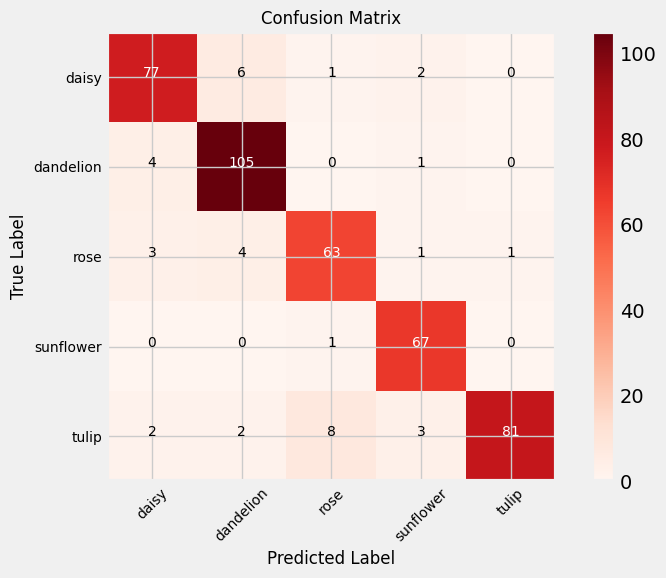

# Compare the Model Performances

In [ ]:
test_results = [
    {'Test': 'CNN', 'Accuracy Score': 0.85, 'Val_Accuracy': 0.74},
    {'Test': 'EfficientNetB3', 'Accuracy Score': 0.97, 'Val_Accuracy': 0.94},
    {'Test': 'Xception', 'Accuracy Score': 0.98, 'Val_Accuracy': 0.91},
    {'Test': 'ResNet152V2', 'Accuracy Score': 0.98, 'Val_Accuracy': 0.92},
    {'Test': 'DenseNet201', 'Accuracy Score': 0.96, 'Val_Accuracy': 0.92},
    {'Test': 'MobileNetV2', 'Accuracy Score': 0.97, 'Val_Accuracy': 0.93}
     ]

# Transform to DataFrame 
results_df = pd.DataFrame(test_results)

# Sort by f1-score and Misclassification together; 
sorted_results = results_df.sort_values(by=['Accuracy Score', 'Val_Accuracy'], ascending=[False, False])

# Let's show the results by resetting the indexes
sorted_results_reset = sorted_results.reset_index(drop=True)

# Show the results;   
print(sorted_results_reset) 

# Conclusion

### Model Selection Summary 🚀

When selecting a model based on the training and validation accuracy scores, the key factors to consider are **generalization** and **consistent performance**:

1. **Generalization**: Validation accuracy (Val_Accuracy) is a more important metric as it indicates how well the model will perform on unseen data. 🔍
2. **Consistent Performance**: The model should ideally have both high training and validation accuracy. A large gap between these two indicates overfitting. ⚠️

#### Analysis of Models:
- **ResNet152V2** (232 MB): High training accuracy (0.98) and good validation accuracy (0.92), but with slight overfitting. 🧠
- **Xception** (88 MB): High training accuracy (0.98) and good validation accuracy (0.91), but shows signs of overfitting. 💡
- **EfficientNetB3** (48 MB): High training accuracy (0.97) and excellent validation accuracy (0.94), indicating good generalization. 🌟
- **MobileNetV2** (14 MB): Similar to EfficientNetB3 with high training accuracy (0.97) and strong validation accuracy (0.93). ⚡️
- **DenseNet201** (80 MB): High training accuracy (0.96) and good validation accuracy (0.92), but slightly heavier. 🔋

#### Recommended Model: **EfficientNetB3** (48 MB) 🎯
- **Reason**: EfficientNetB3 has the highest validation accuracy (0.94) with minimal signs of overfitting, making it the most balanced choice for generalization and performance. 🏅
- **Alternative**: **MobileNetV2** (14 MB) is also a strong candidate due to its lightweight nature and competitive performance (Val_Accuracy of 0.93). 🏃‍♂️

EfficientNetB3 is recommended for its balance between performance, model size, and computational efficiency, especially for real-world applications. 🔥


# Collaboration:

This study, in collaboration with **Duygu Jones**, applies a CNN model along with **10 different transfer learning models** to the Flowers Recognition dataset. Additional models explored include:

- VGG16
- InceptionV3
- NASNetMobile
- EfficientNetB3
- EfficientNetV2-S
- ConvNeXtTiny

For further details on these models and their implementation, please refer to the Kaggle notebook available at this link: [Flowers Rec | CNN | 10 Transfer Learning | Part-1 🌻](https://www.kaggle.com/code/duygujones/flowers-rec-cnn-10-transfer-learning-part-1)


A big thank you to Duygu Jones for your help and support throughout this project. I'm truly grateful.

Thank you to everyone who took the time to engage with this work, whether through comments, feedback, or simply showing support. Your interest means a lot and encourages us to keep learning and improving.


<div style="padding:15px;color:white;margin:0;font-size:150%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:#800020;letter-spacing:1px;overflow:hidden"><b>THANK YOU</b></div>

<div style="text-align: center;">
  <b>If you want to be the first to be informed about new projects, please do not forget to follow us - by Fatma Nur AZMAN</b><br>
  <div style="padding:10px; border: 2px solid #800020; border-radius: 10px; display: inline-block; margin-top: 10px;">
    <a href="https://fatmanurazman.vercel.app/" style="color:#D3D3D3;">Fatmanurazman.com |</a>  
    <a href="https://www.linkedin.com/in/fatma-nur-azman/" style="color:#D3D3D3;">Linkedin |</a>  
    <a href="https://github.com/Fatma-Nur-Azman" style="color:#D3D3D3;">Github |</a>  
    <a href="https://www.kaggle.com/fnurazman" style="color:#D3D3D3;">Kaggle |</a>
    <a href="https://public.tableau.com/app/profile/fatma.nur.azman/vizzes" style="color:#D3D3D3;">Tableau</a>
  </div>
</div>
